# Car price prediction AI

### Attribute Information

1. symboling: -3, -2, -1, 0, 1, 2, 3. 
2. normalized-losses: continuous from 65 to 256. 
3. make: alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo 
4. fuel-type: diesel, gas. 
5. aspiration: std, turbo. 
6. num-of-doors: four, two. 
7. body-style: hardtop, wagon, sedan, hatchback, convertible. 
8. drive-wheels: 4wd, fwd, rwd. 
9. engine-location: front, rear. 
10. wheel-base: continuous from 86.6 to 120.9. 
11. length: continuous from 141.1 to 208.1. 
12. width: continuous from 60.3 to 72.3. 
13. height: continuous from 47.8 to 59.8. 
14. curb-weight: continuous from 1488 to 4066. 
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. 
16. num-of-cylinders: eight, five, four, six, three, twelve, two. 
17. engine-size: continuous from 61 to 326. 
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. 
19. bore: continuous from 2.54 to 3.94. 
20. stroke: continuous from 2.07 to 4.17. 
21. compression-ratio: continuous from 7 to 23. 
22. horsepower: continuous from 48 to 288. 
23. peak-rpm: continuous from 4150 to 6600. 
24. city-mpg: continuous from 13 to 49. 
25. highway-mpg: continuous from 16 to 54. 
26. price: continuous from 5118 to 45400.

## Data Exploration

###  Import Data

In [56]:
import pandas as pd
import numpy as np
cars = pd.read_csv("Cars.data", delimiter=',', names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'])

print(cars.shape)
cars.head()

(205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Data Cleaning

In [57]:
counter=0
for x in cars['symboling']:
    if x=='?':
        counter=counter+1
print(counter)
counter=0
for x in cars['normalized-losses']:
    if x=='?':
        counter=counter+1
print(counter)
#cars['normalized-losses'].value_counts()['?']

0
41


#### Number of columns which have missing values in the cars data

In [58]:
counter=0
for x in cars:
    for c in cars[x]:
        if c == '?':
            counter=counter+1
            break
print(counter)

7


#### Total number of missing values in the cars data

In [59]:
counter=0
for x in cars:
    for c in cars[x]:
        if c == '?':
            counter=counter+1
print(counter)

59


#### Replace the missing values using the following strategy:

- For numerical column, replace the missing values with the mean value of that column.
- For categorical column, replace the missing values with the most frequent value of that column.

In [60]:
from sklearn.impute import SimpleImputer
caticorigal_data =['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']
notCat = [e for e in cars.columns.values if e not in caticorigal_data]

cars = cars.replace('?', np.nan)

clean_cars = cars.copy()

for x in notCat:
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    clean_cars[x] = imp_mean.fit_transform(clean_cars[[x]]).ravel()

for x in caticorigal_data:
    imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    clean_cars[x] = imp_cat.fit_transform(clean_cars[[x]]).ravel()

clean_cars.head(10)



,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.000000
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.000000
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.000000
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.000000
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.000000
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.000000
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,17710.000000
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,18920.000000
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131.0,mpfi,3.13,3.40,8.3,140.0,5500.0,17.0,20.0,23875.000000
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131.0,mpfi,3.13,3.40,7.0,160.0,5500.0,16.0,22.0,13207.129353


###  Data Exploration

#### A histogram on `Price` and findings

Text(0, 0.5, '#Count')

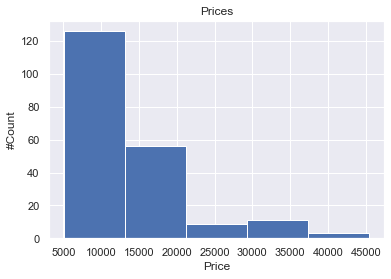

In [61]:
import matplotlib.pyplot as plt
plt.hist(clean_cars['price'], bins=5)
plt.title("Prices")
plt.xlabel("Price")
plt.ylabel("#Count")

There is a considerably larger cluser of cars in the lower price ranges over the cars in in the larger price ranges.

#### Relationship between `price` and `horsepower`

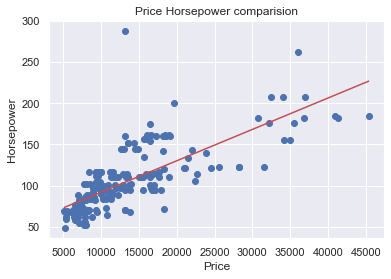

In [62]:
plt.scatter(clean_cars['price'], clean_cars['horsepower'])
plt.title("Price Horsepower comparision")
plt.xlabel("Price")
plt.ylabel("Horsepower")

#produces line of best fit
plt.plot(np.unique(clean_cars['price']), np.poly1d(np.polyfit(clean_cars['price'], clean_cars['horsepower'], 1))(np.unique(clean_cars['price'])), c='r')

Besides from a few outliers there seems to be a strong correlation between the cost of a car and the hourse power provided in the car with a linear increase as hourse power increases so does that of the cost

#### Relationship between `price` and `make`

Text(0, 0.5, 'Price')

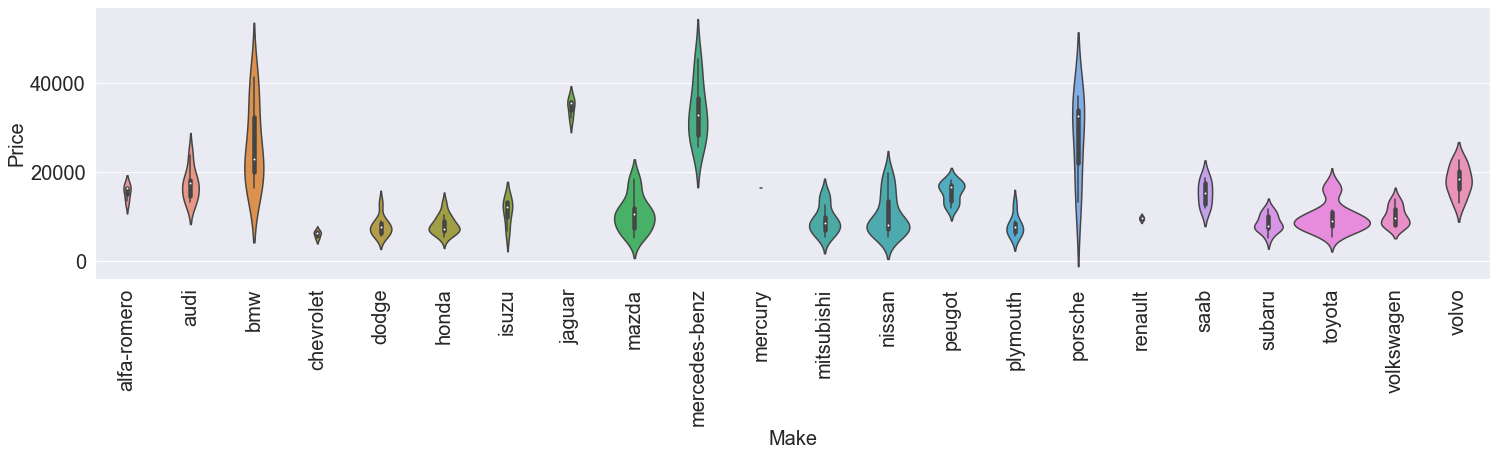

In [63]:
import seaborn as sns

plt.figure(figsize=(25,5))

sns.set()

gra = sns.violinplot(clean_cars['make'], clean_cars['price'], scale='count', width=1.2)
gra.tick_params(labelsize=20)
gra.xaxis.set_tick_params(rotation=90)
gra.set_xlabel("Make", fontsize=20)
gra.set_ylabel("Price", fontsize=20)

Companies that offer primarily higher cost cars tend to offer cars of lower value whereas companies that offer primarily lower cost cars tend to stick to their lower economical price range.

#### Relationship between `price` and `make`

Text(0, 0.5, 'Price')

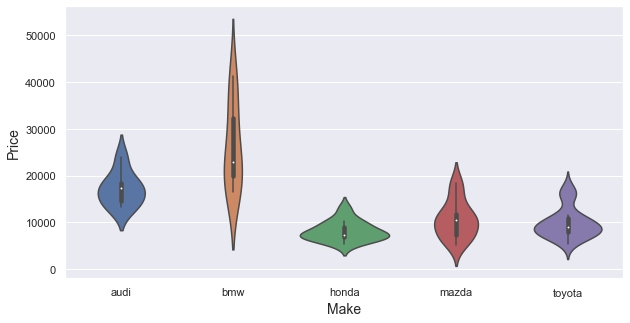

In [64]:
plt.figure(figsize=(10,5))

sns.set()

accepted_Rows = clean_cars['make'].isin(['honda', 'mazda', 'bmw', 'audi', 'toyota'])

gra = sns.violinplot(clean_cars[accepted_Rows]['make'], clean_cars[accepted_Rows]['price'])
gra.set_xlabel("Make", fontsize=14)
gra.set_ylabel("Price", fontsize=14)

bmw seems to heavily out preform the other companies shown in terms of the range of prices available.

## KNN Modeling

### Cleaning data

In [65]:
numeric_cars = clean_cars[notCat]
numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


### normalization of data

In [72]:
from sklearn.preprocessing import Binarizer
pd.options.mode.chained_assignment = None#remove warning because we know it is safe
binVal = numeric_cars['price'].mean()
binarizer = Binarizer(binVal)
numeric_cars['price'] = binarizer.fit_transform(numeric_cars[['price']]).ravel()
pd.options.mode.chained_assignment ='warn'#add warnings back

numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,1.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,1.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,1.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,1.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,1.0


### Train the KNN model with classification

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
training_set, test_set = train_test_split(numeric_cars, test_size = 0.25, random_state = 1)

model = KNeighborsClassifier()

X_train = training_set.drop(['price'], axis=1)
y_train = training_set['price']
X_test = test_set.drop(['price'], axis=1) #axis=1 means drop columns
y_test = test_set['price']

model.fit(X_train, y_train)

y_prediction = model.predict(X_test)

from sklearn.metrics import roc_auc_score
print('\033[1m' + "AUC: "+ '\033[0m' + str(roc_auc_score(y_test,y_prediction)))

AUC: 0.9126050420168067


### Train the KNN classfication model via different k values.   

Text(0, 0.5, 'Accuracy')

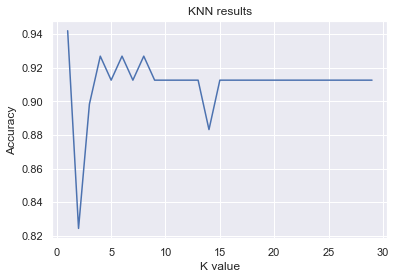

In [68]:
kVal = []
res = []
for x in range(1,30):
    model = KNeighborsClassifier(n_neighbors=x)

    model.fit(X_train, y_train)

    y_prediction = model.predict(X_test)
    kVal.append(x)
    res.append(roc_auc_score(y_test,y_prediction))
    
plt.plot(kVal, res)
plt.title("KNN results")
plt.xlabel("K value")
plt.ylabel("Accuracy")

### Optimise the parameter k via cross-validated   

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters = {'n_neighbors':np.arange(1,30)}
clf = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parameters, cv=5, iid=True)
clfRes = clf.fit(X_train, y_train)
#print("==================")
#print(clfRes.best_score_)
#print(clfRes.best_estimator_)
#print(clfRes.best_params_)
#print("==================\n")

print('\033[1m', end ='')
print("The best k value is: ", end = '')
print('\033[0m', end ='')
print(str(clfRes.best_params_['n_neighbors']))

model = KNeighborsClassifier(n_neighbors=clfRes.best_params_['n_neighbors'])

X_train = training_set.drop(['price'], axis=1)
y_train = training_set['price']
X_test = test_set.drop(['price'], axis=1) #axis=1 means drop columns
y_test = test_set['price']

model.fit(X_train, y_train)

y_prediction = model.predict(X_test)

print('\033[1m', end ='')
print("Corresponding AUC performance:")
print('\033[0m', end ='')
print(str(roc_auc_score(y_test,y_prediction)))

NameError: name 'np' is not defined

 ### Train the KNN classification model via 5-fold CV

Text(0, 0.5, 'Accuracy')

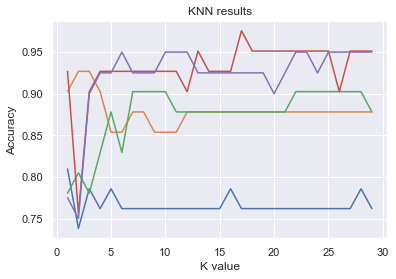

In [70]:
from sklearn.model_selection import cross_val_score
kVal = []
res = []
all_res = []
for x in range(1,30):
    model = KNeighborsClassifier(n_neighbors=x)
    cv_scores = cross_val_score(model, numeric_cars.drop(['price'], axis=1), numeric_cars['price'], cv=5)
    kVal.append(x)
    res.append(np.mean(cv_scores))
    all_res.append(cv_scores)
plt.plot(kVal, all_res)
plt.title("KNN results")
plt.xlabel("K value")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

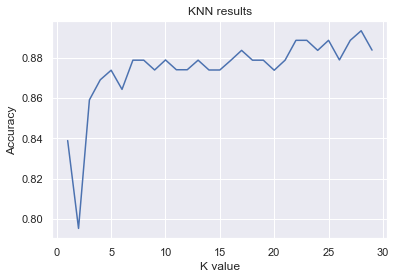

In [71]:
plt.plot(kVal, res)
plt.title("KNN results")
plt.xlabel("K value")
plt.ylabel("Accuracy")